In [1]:
import pandas as pd

penguins_df = pd.read_csv(r"C:\Users\Ays\Documents\FAU Spring 25\CAP 5768\penguins.csv")

print("First few rows of the dataset:")
print(penguins_df.head())

print("\nDataset info:")
penguins_df.info()

print("\nSummary statistics:")
print(penguins_df.describe(include='all'))


First few rows of the dataset:
   rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      1  Adelie  Torgersen            39.1           18.7              181.0   
1      2  Adelie  Torgersen            39.5           17.4              186.0   
2      3  Adelie  Torgersen            40.3           18.0              195.0   
3      4  Adelie  Torgersen             NaN            NaN                NaN   
4      5  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-n

In [2]:
print("\nMissing values before cleaning:")
print(penguins_df.isnull().sum())

penguins_df.fillna(penguins_df.mean(numeric_only=True), inplace=True)
penguins_df['sex'].fillna('Unknown', inplace=True)

print("\nMissing values after cleaning:")
print(penguins_df.isnull().sum())



Missing values before cleaning:
rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

Missing values after cleaning:
rowid                0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64


C:\Users\Ays\AppData\Local\Temp\ipykernel_3440\470097237.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  penguins_df['sex'].fillna('Unknown', inplace=True)


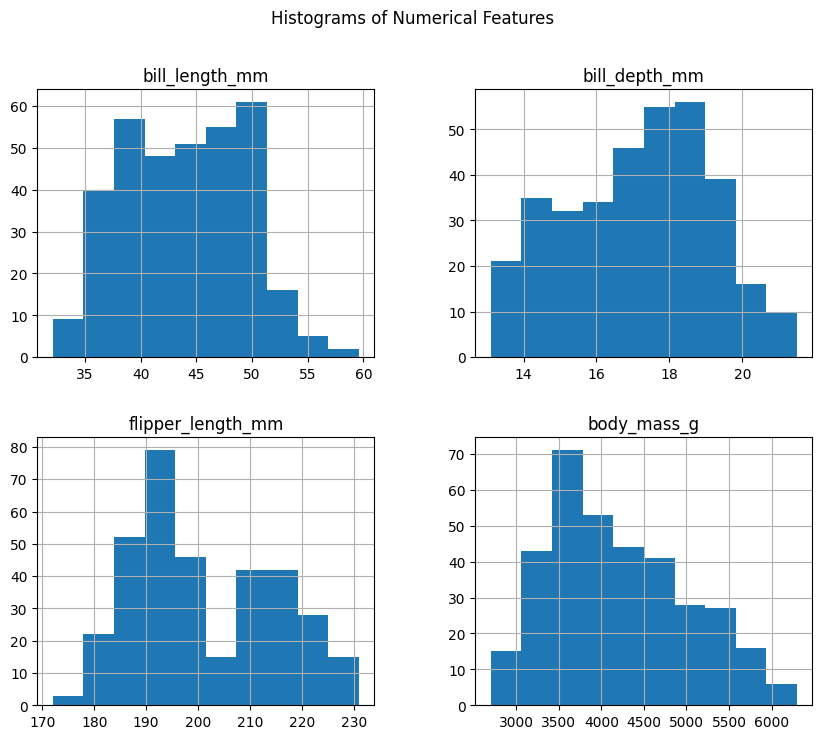

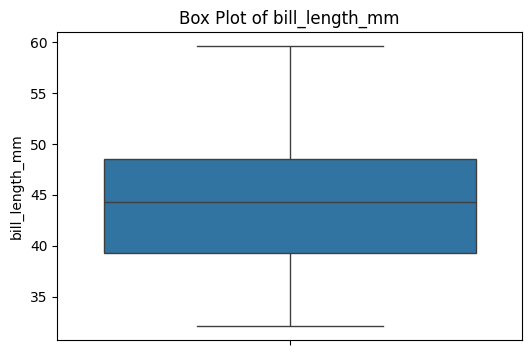

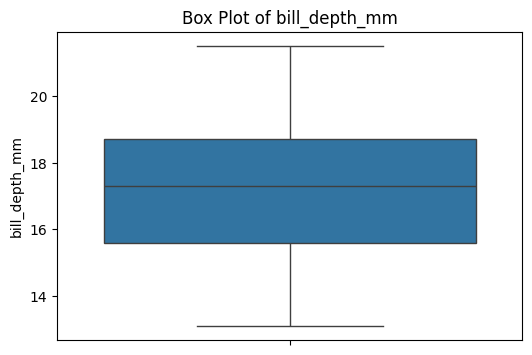

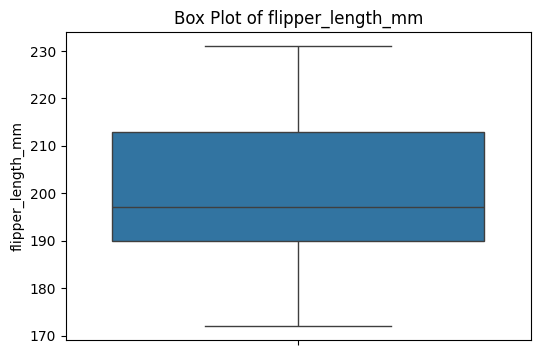

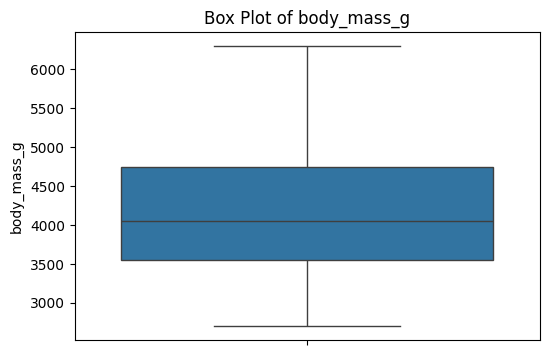

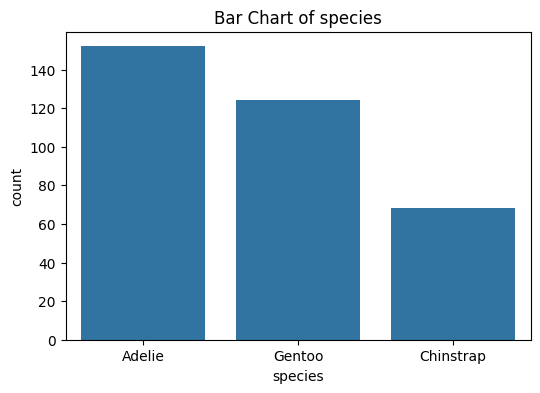

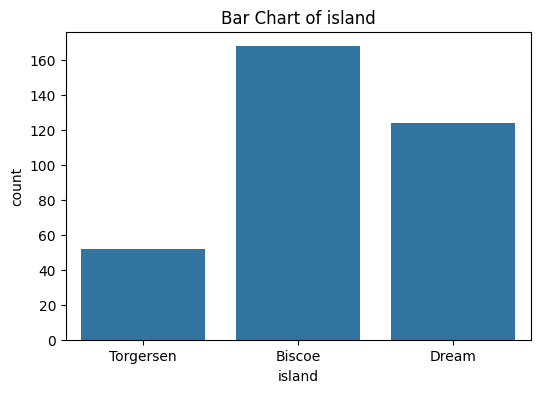

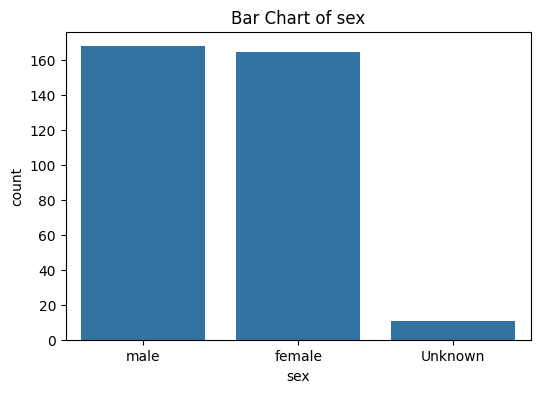

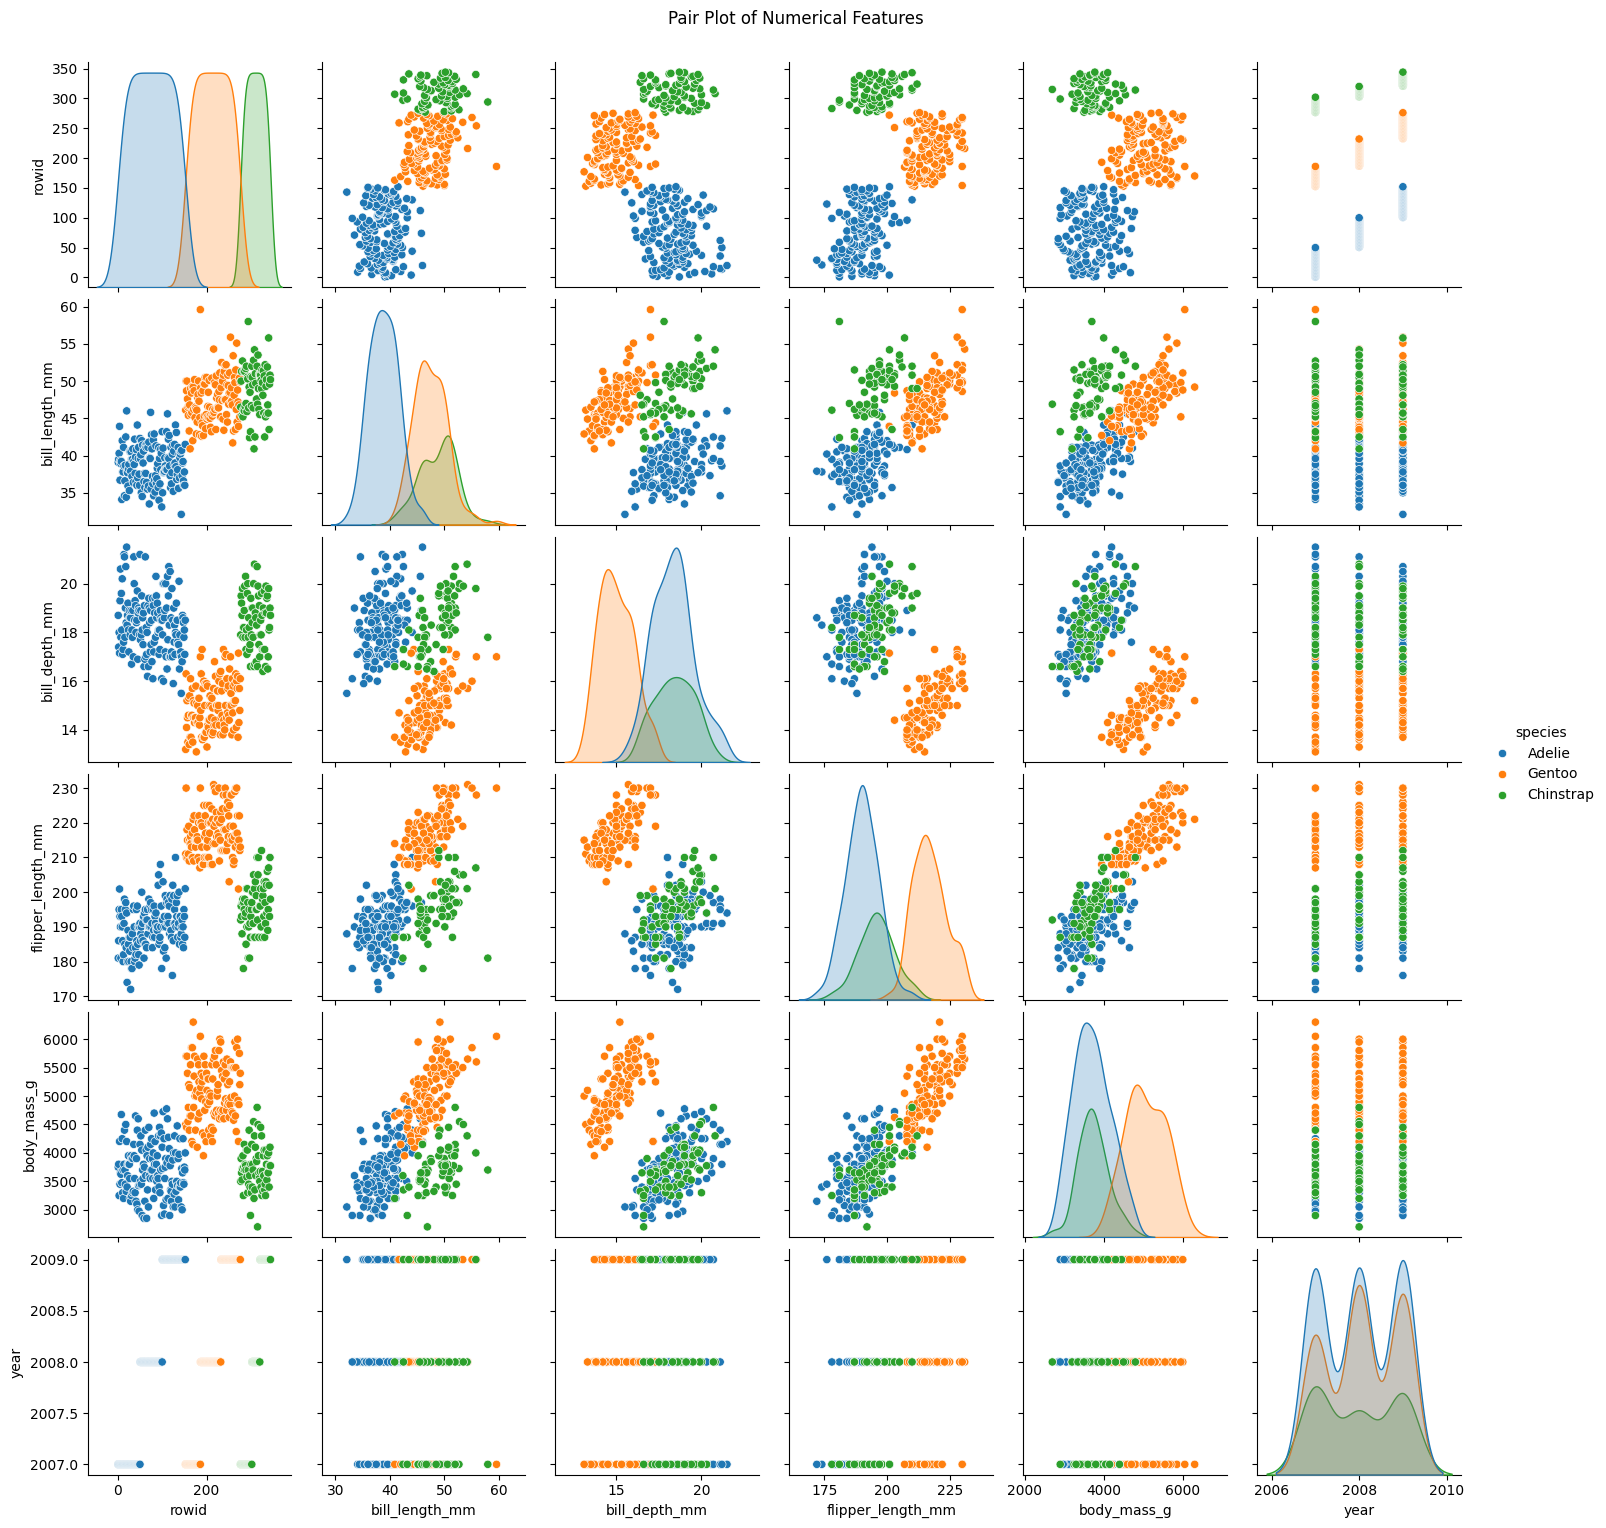

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins_df[numerical_columns].hist(figsize=(10, 8))
plt.suptitle("Histograms of Numerical Features")
plt.show()

for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=penguins_df, y=column)
    plt.title(f"Box Plot of {column}")
    plt.show()

categorical_columns = ['species', 'island', 'sex']
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=penguins_df, x=column)
    plt.title(f"Bar Chart of {column}")
    plt.show()

sns.pairplot(penguins_df, hue="species", diag_kind="kde")
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()


In [4]:
mean_vector = penguins_df[numerical_columns].mean()
print("\nMultivariate Mean Vector:")
print(mean_vector)



Multivariate Mean Vector:
bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64


In [5]:
import numpy as np

centered_data = penguins_df[numerical_columns] - mean_vector

cov_matrix_inner = np.cov(centered_data.T)
print("\nSample Covariance Matrix (Inner Product):")
print(cov_matrix_inner)

cov_matrix_outer = centered_data.T @ centered_data / (len(penguins_df) - 1)
print("\nSample Covariance Matrix (Outer Product):")
print(cov_matrix_outer)



Sample Covariance Matrix (Inner Product):
[[ 2.96332523e+01 -2.51945706e+00  5.00820291e+01  2.59039896e+03]
 [-2.51945706e+00  3.87706861e+00 -1.61184142e+01 -7.43012250e+02]
 [ 5.00820291e+01 -1.61184142e+01  1.96578837e+02  9.76713084e+03]
 [ 2.59039896e+03 -7.43012250e+02  9.76713084e+03  6.39381042e+05]]

Sample Covariance Matrix (Outer Product):
                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm          29.633252      -2.519457          50.082029   
bill_depth_mm           -2.519457       3.877069         -16.118414   
flipper_length_mm       50.082029     -16.118414         196.578837   
body_mass_g           2590.398957    -743.012250        9767.130837   

                     body_mass_g  
bill_length_mm       2590.398957  
bill_depth_mm        -743.012250  
flipper_length_mm    9767.130837  
body_mass_g        639381.041890  



Correlation (Cosine Similarity) between bill_length_mm and bill_depth_mm: -0.23505287035553268


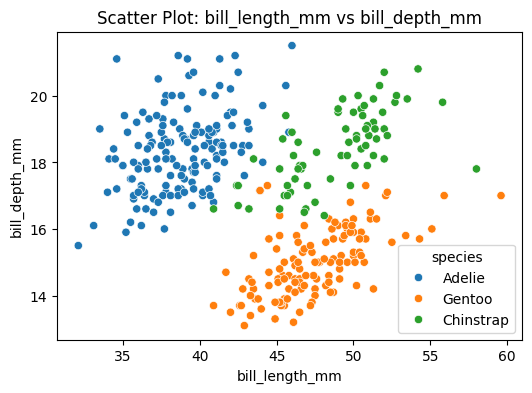

In [6]:
bill_length_centered = centered_data['bill_length_mm']
bill_depth_centered = centered_data['bill_depth_mm']
cosine_similarity = np.dot(bill_length_centered, bill_depth_centered) / (
    np.linalg.norm(bill_length_centered) * np.linalg.norm(bill_depth_centered)
)
print(f"\nCorrelation (Cosine Similarity) between bill_length_mm and bill_depth_mm: {cosine_similarity}")

plt.figure(figsize=(6, 4))
sns.scatterplot(data=penguins_df, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.title("Scatter Plot: bill_length_mm vs bill_depth_mm")
plt.show()


In [7]:
categorical_dummies = pd.get_dummies(penguins_df[categorical_columns], drop_first=True)
categorical_cov_matrix = np.cov(categorical_dummies.T)
print("\nCovariance Matrix of Categorical Attributes:")
print(categorical_cov_matrix)



Covariance Matrix of Categorical Attributes:
[[ 0.15906163 -0.07146247  0.12678826 -0.02996813  0.00403417  0.00230524]
 [-0.07146247  0.23120212 -0.13031392 -0.05464777 -0.00430538  0.00128822]
 [ 0.12678826 -0.13031392  0.23120212 -0.05464777  0.00444098  0.00420367]
 [-0.02996813 -0.05464777 -0.05464777  0.12868669 -0.00274595 -0.00698352]
 [ 0.00403417 -0.00430538  0.00444098 -0.00274595  0.25031358 -0.23493118]
 [ 0.00230524  0.00128822  0.00420367 -0.00698352 -0.23493118  0.25059326]]


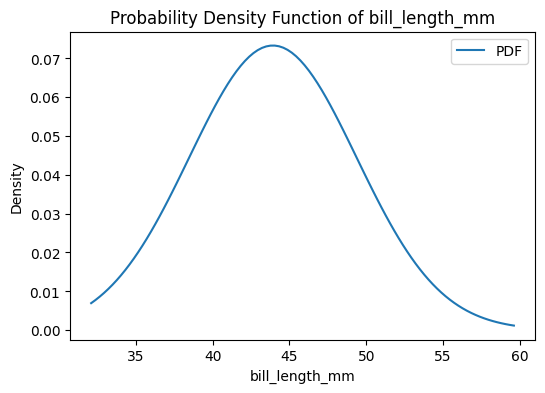

In [8]:
from scipy.stats import norm

first_numerical = 'bill_length_mm'
mu, sigma = penguins_df[first_numerical].mean(), penguins_df[first_numerical].std()
x = np.linspace(penguins_df[first_numerical].min(), penguins_df[first_numerical].max(), 100)
pdf = norm.pdf(x, mu, sigma)

plt.figure(figsize=(6, 4))
plt.plot(x, pdf, label="PDF")
plt.title(f"Probability Density Function of {first_numerical}")
plt.xlabel(first_numerical)
plt.ylabel("Density")
plt.legend()
plt.show()


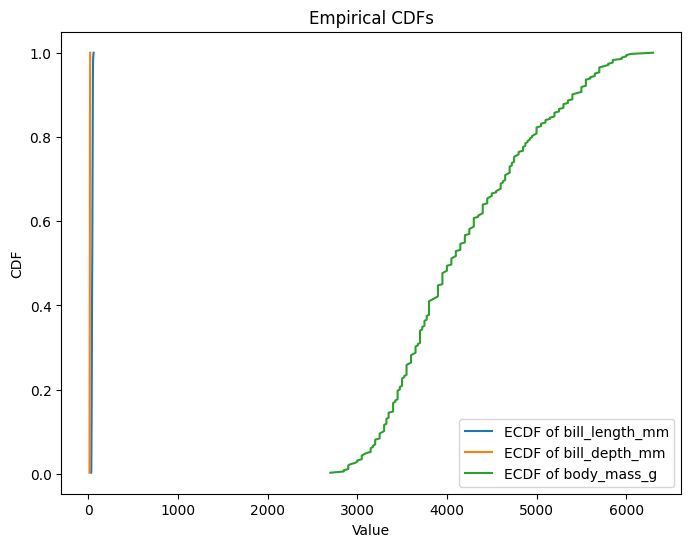

In [9]:
plt.figure(figsize=(8, 6))
for column in ['bill_length_mm', 'bill_depth_mm', 'body_mass_g']:
    sorted_data = np.sort(penguins_df[column])
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, cdf, label=f"ECDF of {column}")

plt.title("Empirical CDFs")
plt.xlabel("Value")
plt.ylabel("CDF")
plt.legend()
plt.show()


In [10]:
variances = penguins_df[numerical_columns].var()
max_variance_attr = variances.idxmax()
min_variance_attr = variances.idxmin()
print(f"\nNumerical attribute with largest variance: {max_variance_attr} ({variances[max_variance_attr]})")
print(f"Numerical attribute with smallest variance: {min_variance_attr} ({variances[min_variance_attr]})")



Numerical attribute with largest variance: body_mass_g (639381.0418904403)
Numerical attribute with smallest variance: bill_depth_mm (3.8770686068913776)


In [11]:
cov_matrix = penguins_df[numerical_columns].cov()
cov_values = cov_matrix.unstack()
sorted_cov = cov_values.sort_values()
largest_cov_pair = sorted_cov.idxmax()
smallest_cov_pair = sorted_cov.idxmin()
print(f"\nPair with largest covariance: {largest_cov_pair} ({sorted_cov.max()})")
print(f"Pair with smallest covariance: {smallest_cov_pair} ({sorted_cov.min()})")



Pair with largest covariance: ('body_mass_g', 'body_mass_g') (639381.0418904404)
Pair with smallest covariance: ('bill_depth_mm', 'body_mass_g') (-743.012250012787)
